In this notebook, I am going through the excercises from the Andrew Ng's Coursera ML course (https://www.coursera.org/learn/machine-learning) using Python standard libraries.

I will try to use standard functions from `scikit-learn` as much as possible.

### usual imports

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use('dark_background')
#plt.style.use('seaborn-white')
mpl.rcParams['font.size'] = 12
plt.rc('text', usetex=False)
print os.getcwd()

C:\checkouts\ig\coursera-ml


### scikit-learn imports

In [38]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Ex1: Linear Regression

In [31]:
file1 = r'machine-learning-ex1/ex1/ex1data1.txt'
file2 = r'machine-learning-ex1/ex1/ex1data2.txt'

## Part 1: one variable
see http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html

### Import and plot the dataset

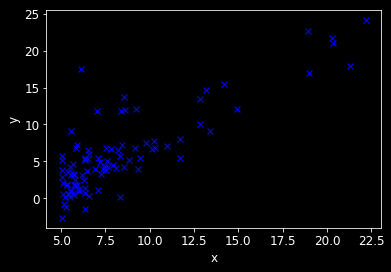

In [146]:
df = pd.read_csv(file1, header=None, names=['x', 'y']);
df = df
#print df.head(3)
plt.plot(df.x, df.y, 'bx')
plt.xlabel('x')
plt.ylabel('y');

### Split data into training and test set (optional)

Samples total:  97
Samples train:  49
Samples test:   48


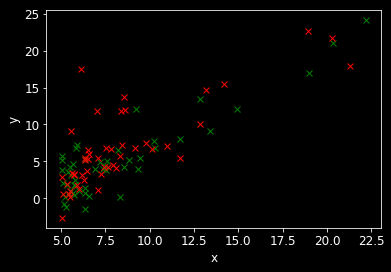

In [147]:
train_fraction = 0.5 # fraction of samples to use for training
np.random.seed(0)
msk = np.random.rand(len(df)) < train_fraction
# this creates two slices (not copies!) of `df`
df_train = df[msk]
df_test = df[~msk]
print 'Samples total: ', len(df)
print 'Samples train: ', len(df_train)
print 'Samples test:  ', len(df_test)
plt.plot(df_train.x, df_train.y, 'gx')
plt.plot(df_test.x, df_test.y, 'rx')
plt.xlabel('x');
plt.ylabel('y');

### Fit using linear regression
This could also be done with `numpy.polyfit`, but we use `sklearn.linear_mode.LenearRegression` functions to introduce the API.

Slope: 1.20, Intercept: -4.59
Train set MSE: 5.33, metrics.R2: 0.81, regr.R2: 0.81
Test set  MSE: 13.57, metrics.R2: 0.56, regr.R2: 0.56


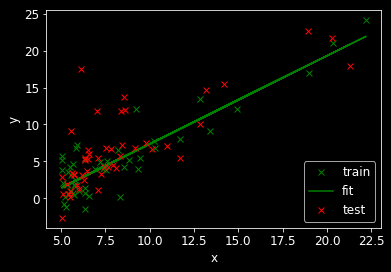

In [150]:
regr = linear_model.LinearRegression()
x = df.x.values.reshape(-1, 1)
train_x = df_train.x.values.reshape(-1, 1)
train_y = df_train.y.values.reshape(-1, 1)
test_x = df_test.x.values.reshape(-1, 1)
test_y = df_test.y.values.reshape(-1, 1)
regr.fit(train_x, train_y)
## The coefficients
print 'Slope: %.2f, Intercept: %.2f' % (regr.coef_, regr.intercept_)

# predict for all samples
df['f'] = regr.predict(x)
# reload slices to get f
df_train = df[msk]
df_test = df[~msk]
train_f = df_train.f.values.reshape(-1, 1)
test_f = df_test.f.values.reshape(-1, 1)
# compute scores on train and test sets

## The mean squared error and R2 score
# R2 score can be computed using `regr.score()` or `sklearn.metrics.r2_score()`
try:
    train_mse = mean_squared_error(train_y, train_f)
    train_r2 = r2_score(train_y, train_f)
    train_r2_alt = regr.score(train_x, train_y)
    print 'Train set MSE: %.2f, metrics.R2: %.2f, regr.R2: %.2f' % (train_mse, train_r2, train_r2_alt)
except:
    pass
try:
    test_mse = mean_squared_error(test_y, test_f)
    test_r2 = r2_score(test_y, test_f)
    test_r2_alt = regr.score(test_x, test_y)
    print 'Test set  MSE: %.2f, metrics.R2: %.2f, regr.R2: %.2f' % (test_mse, test_r2, test_r2_alt)
except:
    pass
# Plot
plt.plot(df_train.x, df_train.y, 'gx', label='train')
plt.plot(df.x, df.f, 'g-', label='fit')
plt.plot(df_test.x, df_test.y, 'rx', label='test')
plt.xlabel('x');
plt.ylabel('y');
plt.legend(loc=4);

## Part 2: multiple variables

### Import and visualize data

,size,beds,price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
50%,1888.000000,3.000000,299900.000000
max,4478.000000,5.000000,699900.000000


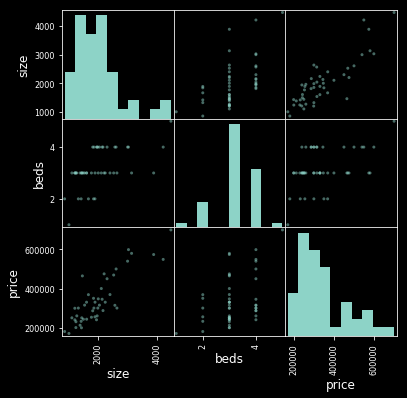

In [197]:
df = pd.read_csv(file2, header=None, names=['size', 'beds', 'price']);
scatter_matrix(df, alpha=0.5, figsize=(6, 6), diagonal='hist')
#plt.plot(df.x, df.y, 'rx')
#plt.xlabel('x')
#plt.ylabel('y')
df.describe(percentiles=[])

### Feature normalization
Normalize features using `sklearn.preprocessing.StandardScaler`
**NB** `Normalizer` scales each sample individually!!!

In [218]:
from sklearn.preprocessing import StandardScaler

In [219]:
scaler = StandardScaler()

In [220]:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)

,size,beds,price
count,4.700000e+01,4.700000e+01,4.700000e+01
mean,-9.448707e-18,2.427137e-16,-6.614095e-17
std,1.010811e+00,1.010811e+00,1.010811e+00
min,-1.461049e+00,-2.882690e+00,-1.378409e+00
50%,-1.433229e-01,-2.260934e-01,-3.275006e-01
max,3.150993e+00,2.430504e+00,2.906063e+00


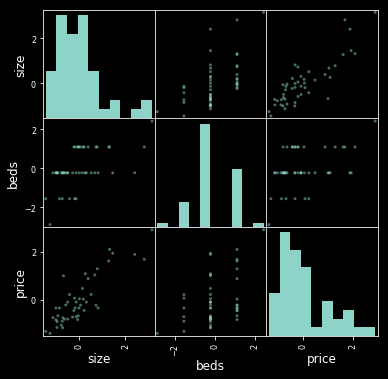

In [221]:
scatter_matrix(df_scaled, alpha=0.5, figsize=(6, 6), diagonal='hist')
#plt.plot(df.x, df.y, 'rx')
#plt.xlabel('x')
#plt.ylabel('y')
df_scaled.describe(percentiles=[])